### References

[1] https://www.copper.org/resources/properties/cryogenic/images/Fundamental-Properties-of-Copper.gif

[2] Russenschuck, S., "Field Computation for Accelerator Magnets", Appendix A, Wiley, 2010

[3] https://qps.web.cern.ch/download/pdf/Quench_Wilson_1.pdf

[4] Bradley, P., Radebaugh, R., "Properties of Selected Materials at Cryogenic Temperatures", NIST, 2013: https://www.nist.gov/publications/properties-selected-materials-cryogenic-temperatures

[5] M. McAshan, "MIITS Integrals for Copper and for Nb-46Ti"

In [2]:
import materials as mat
import quench as qnc
import matplotlib.pyplot as plt
import numpy as np

# MIITS table reference: [5]
from quench import MIITS_table

### 1. Compare two estimations methods for Copper density

**1.1) Method 1: Simple interpolation from two points**

Ref.: [1]

In [3]:
def calc_density_cu_simple(T):
    return np.interp(T,[0, 273.15],[9021, 8934])

**1.2) Method 2: Interpolation from thermal contraction data**

Ref.: [2]

In [5]:
def calc_density_cu(T):
    thermal_contraction = np.interp(T,[20, 80, 200, 300],[0.00323, 0.00302, 0.00149, 0])
    d_300K = 8960
    dd = d_300K*(1-np.power(1+thermal_contraction,3))
    return d_300K - dd

**1.3) Plot Copper mass density difference between two methods**

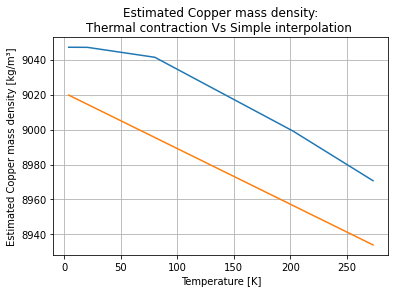

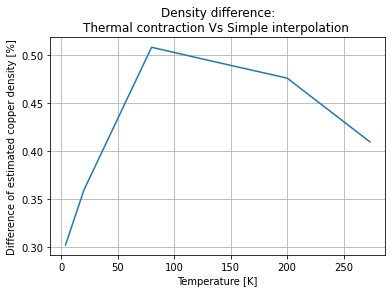

In [6]:
Tmax = 273.15
Tstep = 0.1
T = np.arange(4,Tmax+Tstep,Tstep)

plt.plot(T, calc_density_cu(T), T, calc_density_cu_simple(T))
plt.xlabel('Temperature [K]')
plt.ylabel('Estimated Copper mass density [kg/m³]')
plt.title('Estimated Copper mass density:\nThermal contraction Vs Simple interpolation ')
plt.grid()
plt.show()

plt.plot(T, (calc_density_cu(T)-calc_density_cu_simple(T))/calc_density_cu(T)*100)
plt.xlabel('Temperature [K]')
plt.ylabel('Difference of estimated copper density [%]')
plt.title('Density difference:\nThermal contraction Vs Simple interpolation ')
plt.grid()
plt.show()

### 2. Compare two estimations methods for Nb-Ti density

**2.1) Method 1: Simple interpolation from two points**

Ref (4.2 K).: [3]

Ref (300 K).: [2]

In [7]:
def calc_density_nbti_simple(T):
    return np.interp(T,[4.2, 300],[6200, 6000])

**2.2) Method 2: Interpolation from thermal contraction data**

Ref.: [4]

In [9]:
def calc_density_nbti(T):
    thermal_contraction = np.interp(T,
        [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300],
        [1.88E-03, 1.87E-03, 1.85E-03, 1.82E-03, 1.77E-03, 1.73E-03, 1.67E-03, 1.61E-03, 1.54E-03, 1.47E-03, 1.40E-03, 1.32E-03, 1.25E-03, 1.17E-03, 1.09E-03, 1.01E-03, 9.35E-04, 8.56E-04, 0])
    #thermal_contraction = np.interp(T,[4.2, 77, 300],[0.0035, 0.00325, 0])
    d_300K = 6000
    dd = d_300K*(1-np.power(1+thermal_contraction,3))
    return d_300K - dd

**2.3) Plot Nb-Ti mass density difference between two methods**

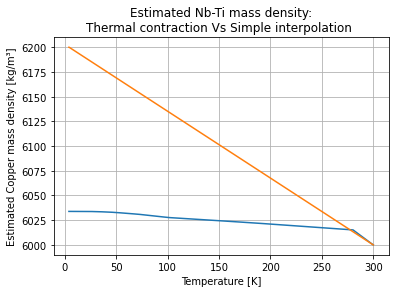

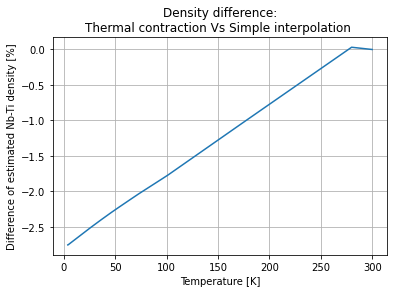

In [10]:
Tmax = 300
Tstep = 0.1
T = np.arange(4,Tmax+Tstep,Tstep)

plt.plot(T, calc_density_nbti(T), T, calc_density_nbti_simple(T))
plt.xlabel('Temperature [K]')
plt.ylabel('Estimated Copper mass density [kg/m³]')
plt.title('Estimated Nb-Ti mass density:\nThermal contraction Vs Simple interpolation ')
plt.grid()
plt.show()

plt.plot(T, (calc_density_nbti(T)-calc_density_nbti_simple(T))/calc_density_nbti(T)*100)
plt.xlabel('Temperature [K]')
plt.ylabel('Difference of estimated Nb-Ti density [%]')
plt.title('Density difference:\nThermal contraction Vs Simple interpolation ')
plt.grid()
plt.show()

### 3. Define functions to calculate MIITS for Copper and Nb-Ti

In [12]:
Tstep = 0.1

def calc_miits_cu(Tmax, RRR, B):
    
    cu = mat.Copper()    
    f_cu = []

    T = np.arange(4,Tmax+Tstep,Tstep)

    # 1e14 factor to convert m^4 to cm^4 (1e8) and IITS to MIITS (Mega = 1e6)
    
    # Constant density
    #f_cu = [cu.density*cu.calc_specific_heat(t) / 
    #        (1e14*cu.calc_resistivity(t,RRR,B)) for t in T]
    
    # Temperature dependant density (Method 2)            
    f_cu = [calc_density_cu(t)*cu.calc_specific_heat(t) / 
            (1e14*cu.calc_resistivity(t,RRR,B)) for t in T]
    
    gamma_cu = np.trapz(f_cu,T)
    return gamma_cu

def calc_miits_nbti(Tmax, RRR, B):
    
    cu = mat.Copper()
    nbti = mat.NbTi()
    f_nbti = []
    
    T = np.arange(4,Tmax+Tstep,Tstep)
    
    # 1e14 factor to convert m^4 to cm^4 (1e8) and IITS to MIITS (Mega = 1e6)
        
    # Constant density
    #f_nbti = [nbti.density*nbti.calc_specific_heat(t,B,True) / 
    #           (1e14*cu.calc_resistivity(t,RRR,B)) for t in T]

    # Constant density (ref.: [5])
    #f_nbti = [6630*nbti.calc_specific_heat(t,B,True) / 
    #           (1e14*cu.calc_resistivity(t,RRR,B)) for t in T]

    # Temperature dependant density (Method 2)
    f_nbti = [calc_density_nbti(t)*nbti.calc_specific_heat(t,B,True) / 
                (1e14*cu.calc_resistivity(t,RRR,B)) for t in T]
        
    gamma_nbti = np.trapz(f_nbti,T)
    return gamma_nbti

### 4. Compare MIITS calculator Vs table for Copper

Table reference.: [5]

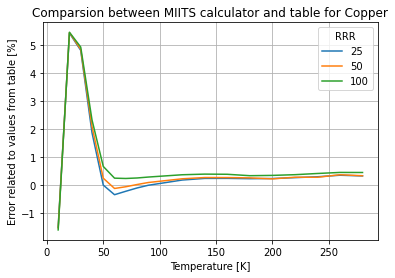

In [13]:
T = np.arange(10,100,10)
T = np.append(T,np.arange(120,300,20))

RRR = [25, 50, 100]

for rrr in RRR:
    cu_est_miits = np.array([])
    cu_table_miits = np.array([])

    for t in T:
        idx_table = list(MIITS_table['Cu'][rrr]['T']).index(t)

        cu_est_miits = np.append(cu_est_miits, calc_miits_cu(t,rrr,0))
        cu_table_miits = np.append(cu_table_miits, MIITS_table['Cu'][rrr]['MIITS'][idx_table])
        
    #plt.plot(T, cu_est_miits, T, cu_table_miits)
    plt.plot(T, (cu_est_miits - cu_table_miits)/cu_table_miits*100)

plt.title('Comparsion between MIITS calculator and table for Copper')
plt.xlabel('Temperature [K]')
plt.ylabel('Error related to values from table [%]')
plt.legend(['25','50','100'], title='RRR')
plt.grid()
plt.show()

### 5. Compare MIITS calculator Vs. table for Nb-Ti

Table reference: [5]

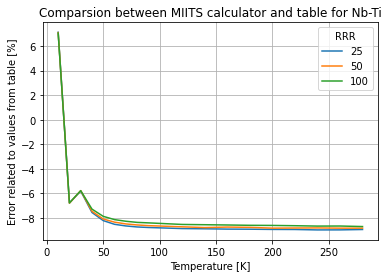

In [14]:
T = np.arange(10,100,10)
T = np.append(T,np.arange(120,300,20))

RRR = [25, 50, 100]

for rrr in RRR:
    nbti_est_miits = np.array([])
    nbti_table_miits = np.array([])

    for t in T:
        idx_table = list(MIITS_table['Nb-Ti'][rrr]['T']).index(t)

        nbti_est_miits = np.append(nbti_est_miits, calc_miits_nbti(t,rrr,0))
        nbti_table_miits = np.append(nbti_table_miits, MIITS_table['Nb-Ti'][rrr]['MIITS'][idx_table])
        
    #plt.plot(T, nbti_est_miits, T, nbti_table_miits)
    plt.plot(T, (nbti_est_miits - nbti_table_miits)/nbti_table_miits*100)

plt.title('Comparsion between MIITS calculator and table for Nb-Ti')
plt.xlabel('Temperature [K]')
plt.ylabel('Error related to values from table [%]')
plt.legend(['25','50','100'], title='RRR')
plt.grid()
plt.show()

### 6. Hot-spot temperature calculator using integration of material properties over temperature

In [19]:
def calc_hot_spot(copper_area, nbti_area, I_op, tau, t_switch, RRR, B = 0):
    
    # MIITS from circuit analysis
    copper_area_cm2 = copper_area * 1e4
    nbti_area_cm2 = nbti_area * 1e4
    ratio = copper_area_cm2 / nbti_area_cm2
    miits = np.power(I_op, 2) * (t_switch + tau/2) * 1e-6
    gamma = miits / np.power(copper_area_cm2, 2)

    # Find MIITS over temperature range until it reaches value found from circuit analysis
    Tstep = 0.5
    Tmax = 200
    T = np.arange(4,Tmax+Tstep,Tstep)

    for t in T:
        gamma_cu = calc_miits_cu(t, RRR, B)
        gamma_nbti = calc_miits_nbti(t, RRR, B)
    
        composite_gamma = gamma_cu + gamma_nbti/ratio

        if composite_gamma > gamma:
            return t
    


### 7. Compare methods to calculate hot-spot temperature

Compare integration method implemented above with interpolation method implemented using MIITS table from [5].

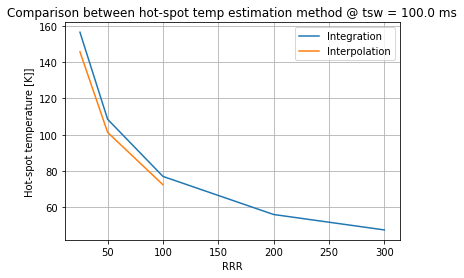

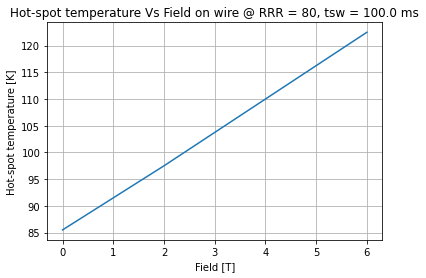

In [28]:
B = [0, 2, 4, 6]
RRR = [25, 50, 100, 200, 300]
t_switch = 0.1

# Calculate hot-spot temperature for different RRRs with both methods
Tnew = [calc_hot_spot(0.279e-6, 0.288e-6, 300, 0.122/2, t_switch, rrr, 0)
        for rrr in RRR]
Told = [qnc.calc_hot_spot(0.279e-6, 0.288e-6, 300, 0.122/2, t_switch, rrr)
        for rrr in RRR[:3]]

plt.plot(RRR,Tnew,RRR[:3],Told)
plt.xlabel('RRR')
plt.ylabel('Hot-spot temperature [K]]')
plt.title('Comparison between hot-spot temp estimation method @ tsw = {} ms'.format(t_switch*1000))
plt.legend(['Integration','Interpolation'])
plt.grid()
plt.show()

# Hot-spot temp Vs field on wire
T_B = [calc_hot_spot(0.279e-6, 0.288e-6, 300, 0.122/2, t_switch, 80, b)
        for b in B]
plt.plot(B,T_B)
plt.xlabel('Field [T]')
plt.ylabel('Hot-spot temperature [K]')
plt.title('Hot-spot temperature Vs Field on wire @ RRR = 80, tsw = {} ms'.format(t_switch*1000))
plt.grid()
plt.show()